Individual Planning Report - Anas Akbar 


In [20]:
library(tidyverse)
library(repr)
library(tidymodels)

In [26]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [27]:
summary(players)
summary(sessions)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

__(1) Data Description__

1. for "players.csv"

Contains 196 observations and 7 variables. Each row represents a unique player

Variables (names and types):

+ experience: character; player’s self reported level of experience.
+ subscribe: logical; whether the player is subscribed to the game-related newsletter or not(TRUE or FALSE);144 players subscribed, 52 did not
+ hashedEmail: character; anonymized unique identifier for a player derived from his/her email
+ played_hours: numeric; total number of hours the player has spent in the game;
Mean = 5.85, Median = 0.10, Min = 0.00, Max = 223.10
+ name: character; the player's display name
+ gender: character; gender of the player
+ Age: numeric; player’s age in years;
Mean = 21.14, Median = 19.00, Min = 9, Max = 58 (2 missing values)

Observations: The "played_hours" of players is a highly skewed variable as most players have very low values. "experiance" and "gender" will have to be converted to factor-type variables for further analysis.

  

2. for "sessions.csv"

Contains 1535 observations and 5 variables. Each row represents an individual gameplay session.

Variables (names and types):

+ hashedEmail: character; anonymized unique identifier for a player derived from his/her email
+ start_time: character; date and time for when the session began in a human readable format
+ end_time: character; date and time for when the session ended in a human readable format
+ original_start_time: numeric; numerical timestamp of session start; 
Mean = 1.719e+12, Median = 1.719e+12, Min = 1.712e+12,  Max = 1.727e+12        
+ original_end_time: numeric; numerical timestamp of session end;
Mean: 1.719e+12, Median = 1.719e+12, Min = 1.712e+12, Max = 1.727e+12 (2 missing values)

Observations:

The "original_start_time" and "original_end_time" are in Unix Timestamp format meaning they are in the number of seconds from 1st of Jan in 1970 - this will have to be reformated someway to use in further analysis. Merging of data sets can be done using the hashed_email variable across both datasets.

__(2) Questions__

Broad Question: (Q2) We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Specific Question: Can a player's age, and gender predict the total number of hours they play?


The "players.csv" dataset contains the total number of hours each player has played, along with their age and gender. I will convert the gender variable to a factor and handle any missing values to prepare the data. This will allow me to apply "regression" methods to see what is the relationship bweteen age & gender and total gameplay hours. To reduce the skewed nature of "played_hours" on the analysis, and to focus on high data contributing players, I will cut the dataset to include only the top 25% of players based on total hours played.

__(3) Exploratory Data Analysis and Visualization)__


In [31]:
library(ggplot2)

players <- read_csv("players.csv") #Data set can be loaded into R


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [63]:
#minimum wrangling

players_wrangled <- players |>
  select(Age, gender, played_hours)|>
    filter(played_hours > 3)

players_wrangled


Age,gender,played_hours
<dbl>,<chr>,<dbl>
9,Male,30.3
17,Male,3.8
17,Female,48.4
17,Male,5.6
27,Agender,12.5
20,Non-binary,218.1
10,Male,3.6
14,Male,17.2
17,Male,53.9


In [64]:
# the mean value for each quantitative variable in the players.csv data set.
players_mean_values <- players |>
summarise(mean_Age = round(mean(Age, na.rm = TRUE), 2), mean_played_hours = round(mean(played_hours), 2))

players_mean_values

mean_Age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


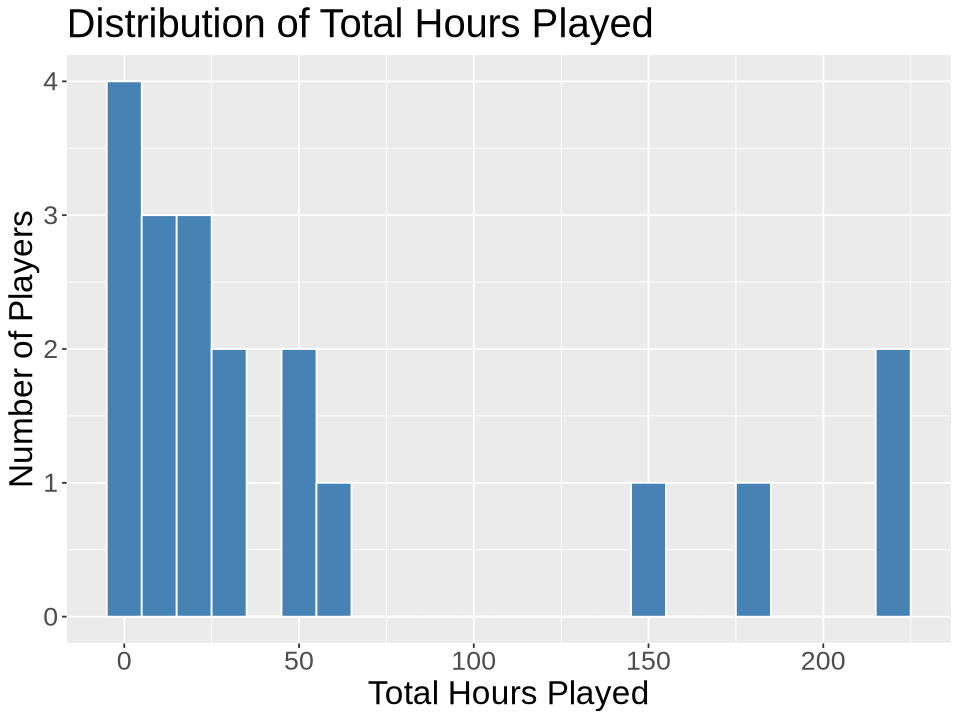

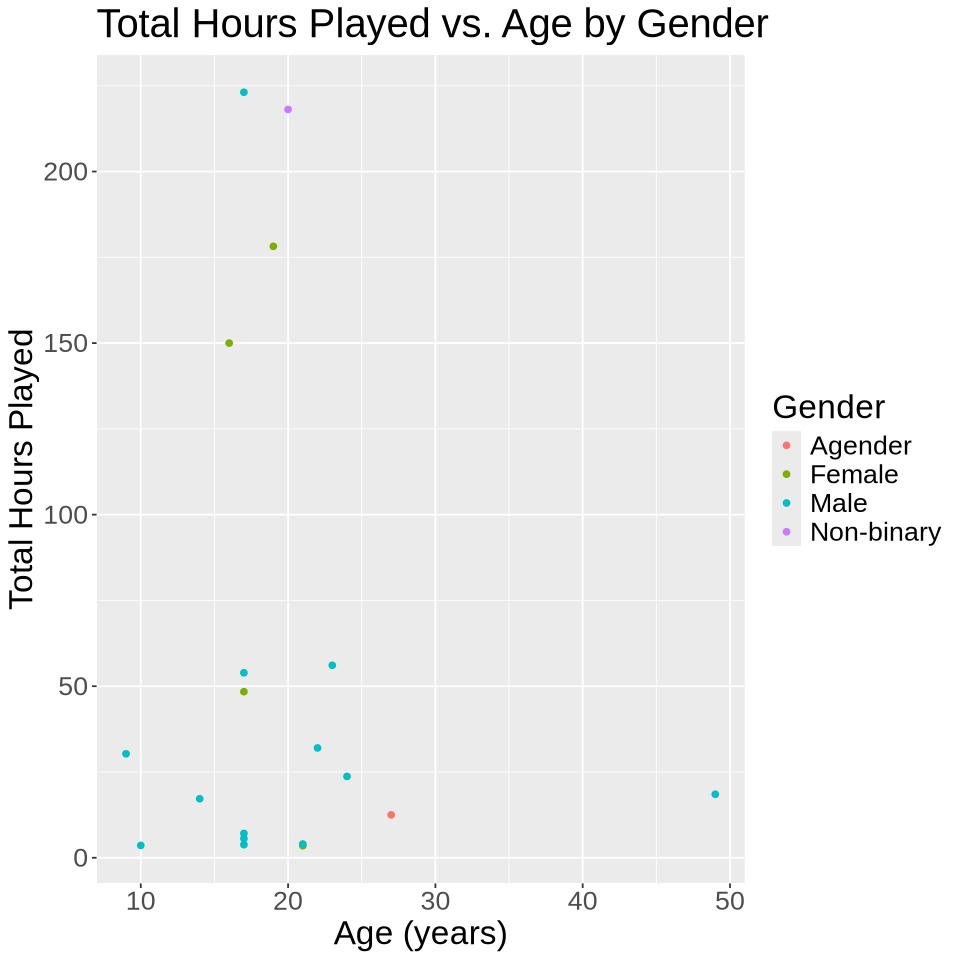

In [66]:
#Exploratory visualizations
options(repr.plot.width = 8, repr.plot.height = 6)

# Plot 1 is a Histogram of played hours
plot_1 <- players_wrangled |>
  ggplot(aes(x = played_hours)) +
  geom_histogram(binwidth = 10, fill = "steelblue", color = "white") +
  labs(title = "Distribution of Total Hours Played", x = "Total Hours Played", y = "Number of Players") +
  theme(text = element_text(size=20))

plot_1



options(repr.plot.width = 8, repr.plot.height = 8)

# Plot 2 is a scatter plot of age vs played hours
plot_2 <- players_wrangled |>
  ggplot(aes(x = Age, y = played_hours, colour = gender)) +
  geom_point() +
  labs(title = "Total Hours Played vs. Age by Gender", x = "Age (years)", y = "Total Hours Played",
    colour = "Gender") +
  theme(text = element_text(size=20))

plot_2


Plot 1 shows that most players have only played a few hours, with very few contributing a large amount of gameplay time. This supports the idea that only a small number of users are actually valuable in terms of data contribution. Plot 2 shows no obvious linear relationship between age and hours played, so a method like K-nearest neighbors regression makes more sense here. Since we only have 19 players (after filtering out low-activity users), getting more data would really help us build a better model.

__(4) Methods and Plan__

K-nearest neighbors (KNN) regression will be used to predict the number of hours played based on a player’s age and gender. This method is appropriate because it makes no assumptions about the form of the relationship between variables, which fits the patterns seen in the data (plots 1 & 2). KNN relies on the assumption that similar observations have similar outcomes. A limitation is that it can be over or under sensitive and performs poorly with small datasets (such as this one). To select the best model, several values of k will be compared using 5-fold cross-validation. The data will be split into training and test sets using an 80/20 split. Another thing to note is that before modeling, gender will be converted to a factor and hours played may be log-transformed to reduce its skewed effect.

__(5) GitHub Repository__
https://github.com/anasakbar-05/DSCI_100_Individual_Planning_Report